In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

df = pd.read_csv(r"C:\Users\shnek\Downloads\drive-download-20230709T122717Z-001-1-1\Walmart DataSet\Walmart DataSet.csv")

print(df.head())
print(df.info())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [2]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


## EDA

In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [6]:
df.fillna(df.median(), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
df.shape

(6435, 8)

## Statistical Analysis 

Correlation:
               Unemployment  Weekly_Sales
Unemployment      1.000000     -0.106176
Weekly_Sales     -0.106176      1.000000
Store              
1      Unemployment   -0.097955
2      Unemployment    0.066325
3      Unemployment   -0.230413
4      Unemployment   -0.337015
5      Unemployment   -0.207043
6      Unemployment    0.044251
7      Unemployment   -0.165382
8      Unemployment   -0.052580
9      Unemployment   -0.191534
10     Unemployment    0.131908
11     Unemployment   -0.020339
12     Unemployment   -0.009286
13     Unemployment   -0.171633
14     Unemployment    0.210786
15     Unemployment    0.078905
16     Unemployment   -0.070864
17     Unemployment   -0.263600
18     Unemployment    0.139179
19     Unemployment    0.101464
20     Unemployment   -0.095341
21     Unemployment    0.218367
22     Unemployment    0.039043
23     Unemployment   -0.077169
24     Unemployment   -0.012261
25     Unemployment   -0.004958
26     Unemployment   -0.066899
27     Unem

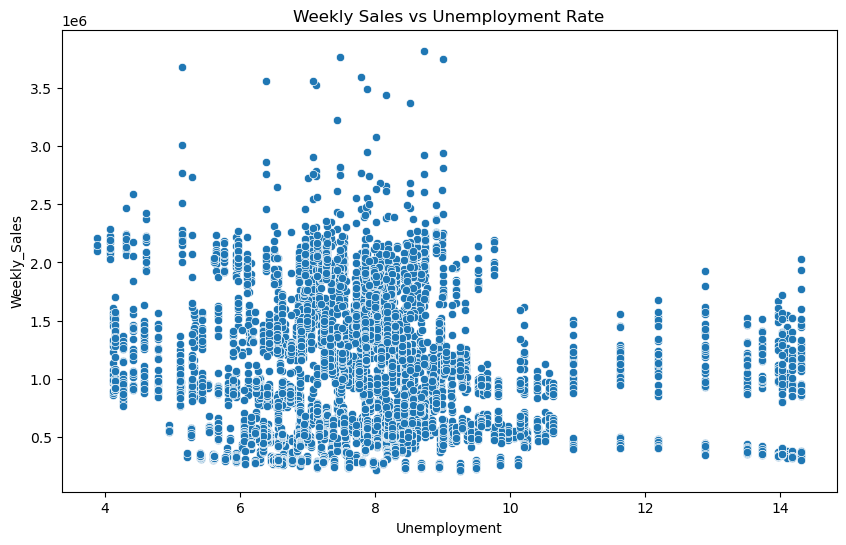

In [9]:
unemployment_corr = df[['Unemployment', 'Weekly_Sales']].corr()
print("Correlation:\n", unemployment_corr)

store_unemployment = df.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().iloc[0::2, -1]
print(store_unemployment)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title("Weekly Sales vs Unemployment Rate")
plt.show()

## Seasonal Trend Analysis

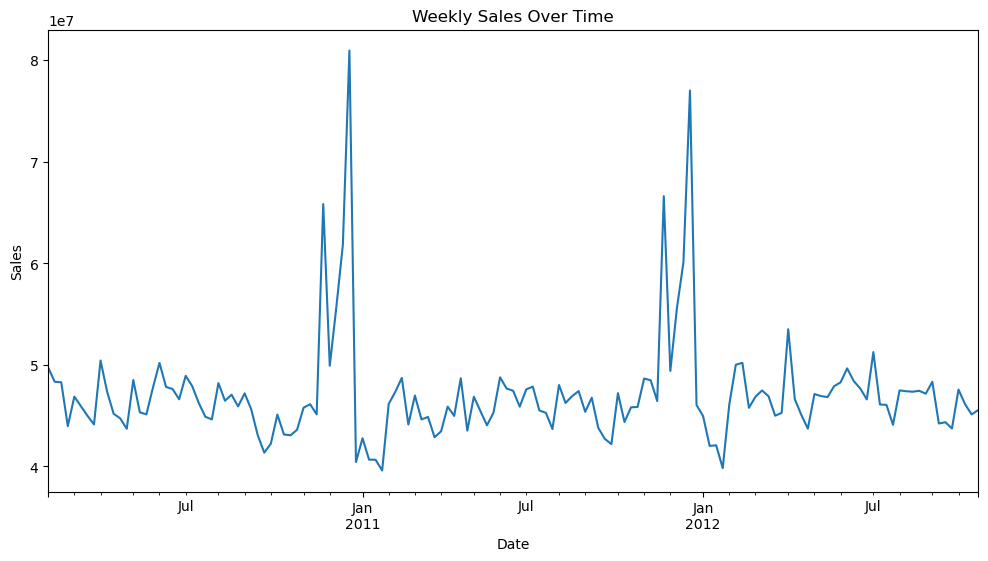

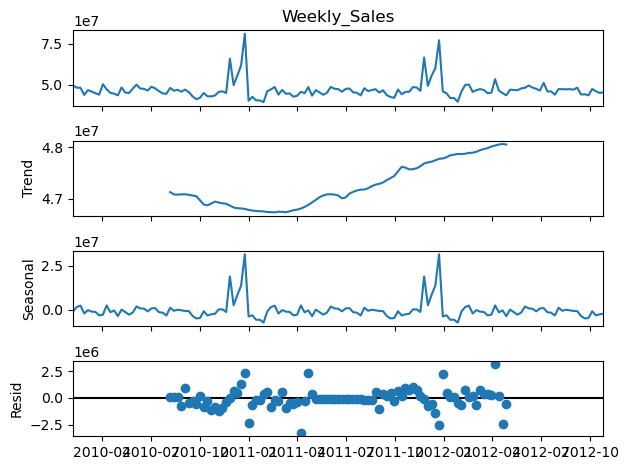

In [10]:
df_weekly = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 6))
df_weekly.plot()
plt.title("Weekly Sales Over Time")
plt.ylabel("Sales")
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_weekly, model='additive', period=52)  

result.plot()
plt.show()

Temperature vs Weekly Sales Correlation:
               Temperature  Weekly_Sales
Temperature       1.00000      -0.06381
Weekly_Sales     -0.06381       1.00000


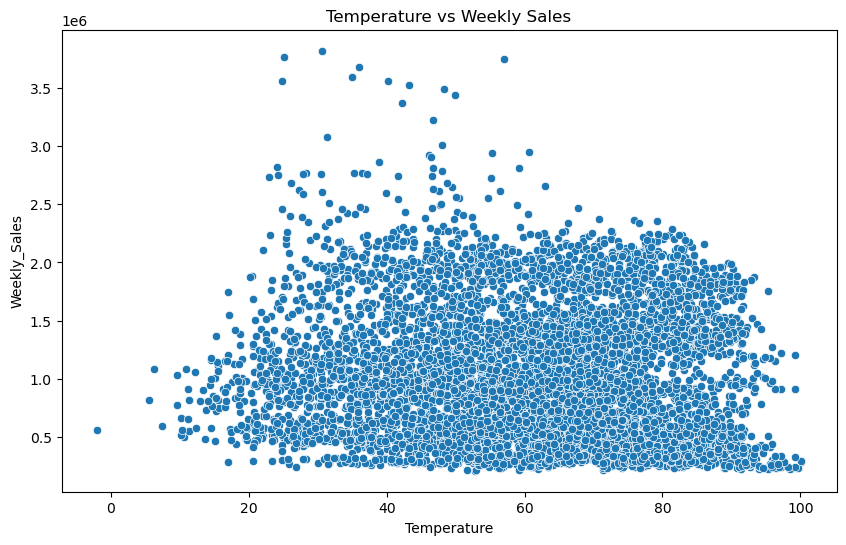

In [11]:
temp_corr = df[['Temperature', 'Weekly_Sales']].corr()
print("Temperature vs Weekly Sales Correlation:\n", temp_corr)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Temperature vs Weekly Sales")
plt.show()

CPI vs Weekly Sales Correlation:
                    CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


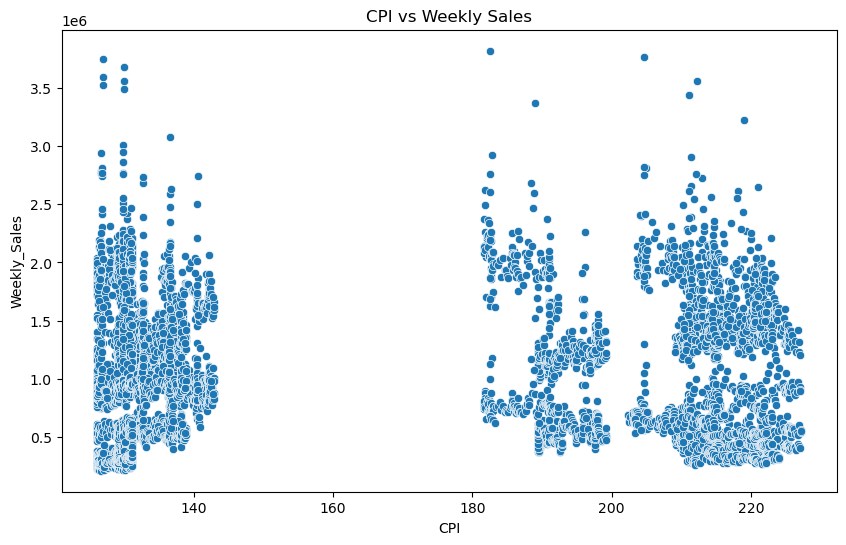

In [12]:
cpi_corr = df[['CPI', 'Weekly_Sales']].corr()
print("CPI vs Weekly Sales Correlation:\n", cpi_corr)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title("CPI vs Weekly Sales")
plt.show()


Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


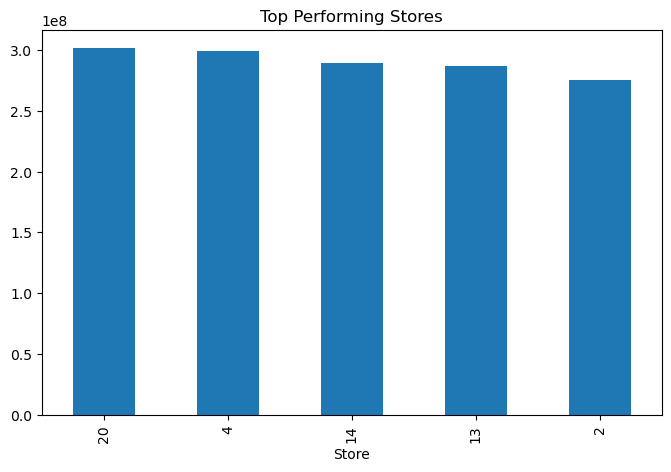

In [13]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top Performing Stores:\n", top_stores.head())

top_stores.head(5).plot(kind='bar', figsize=(8, 5), title="Top Performing Stores")
plt.show()

In [14]:
worst_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
print("Worst Performing Store:\n", worst_store.head(1))

difference = top_stores.iloc[0] - worst_store.iloc[0]
print(f"Difference between Best and Worst Performing Store: {difference}")

Worst Performing Store:
 Store
33    37160221.96
Name: Weekly_Sales, dtype: float64
Difference between Best and Worst Performing Store: 264237570.49999997


## Forecasting Sales Using SARIMA

ADF Test Statistic: -5.908297957186335
p-value: 2.675979158986003e-07


C:\Users\shnek\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\shnek\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\shnek\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


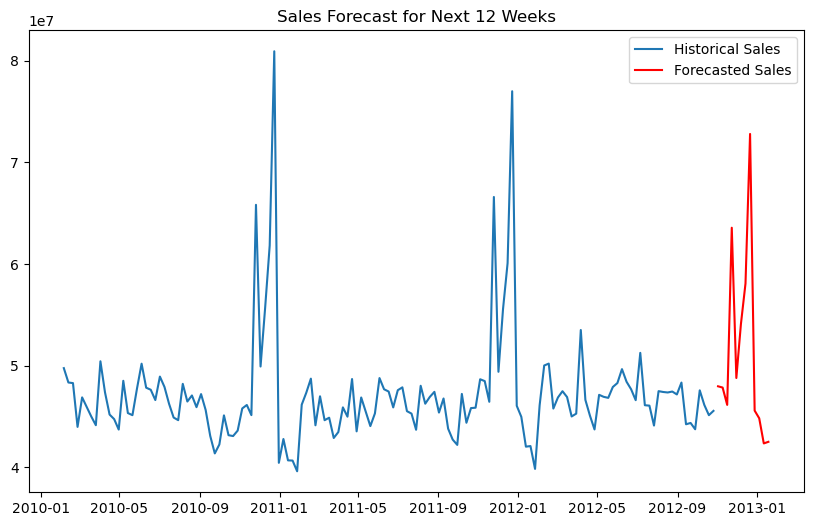

12-Week Forecasted Sales:
 2012-11-02    4.796267e+07
2012-11-09    4.783853e+07
2012-11-16    4.613570e+07
2012-11-23    6.356694e+07
2012-11-30    4.877948e+07
2012-12-07    5.408624e+07
2012-12-14    5.807761e+07
2012-12-21    7.279528e+07
2012-12-28    4.557115e+07
2013-01-04    4.481319e+07
2013-01-11    4.234175e+07
2013-01-18    4.249887e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [15]:
df_weekly = df.groupby('Date')['Weekly_Sales'].sum()

adf_result = adfuller(df_weekly)
print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])

df_weekly_diff = df_weekly.diff().dropna()

model = SARIMAX(df_weekly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(df_weekly, label="Historical Sales")
plt.plot(forecast, label="Forecasted Sales", color='red')
plt.legend()
plt.title("Sales Forecast for Next 12 Weeks")
plt.show()

print("12-Week Forecasted Sales:\n", forecast)